### Time Series Analysis 

The objective of this entire document is to follow each and every step provided in the ChatGPT response and playing with a given data. This has no bearing to the solution at hand. I will be following each individual step in order to get a feel of Time Series Analysis.

<font color = "Red"> Do not waste too much time at each step, get a feel and move on. Do not get stuck. You have everything you need. </font>


<font color = "Red" style = "bold">The following notes are ChatGPT generated, do augumnet them later with whatever you understood when you are done with this and a couple of projects </font>



## Instructions to follow 

**Time Series Analysis Notes**

### 1. Clean Data
- Handle missing values, outliers, and duplicates.
- Convert the date column to a datetime format and set it as the index.
- Ensure consistent frequency by resampling or aggregating data (e.g., daily, monthly).

### 2. Visualize Data
- Plot the raw time series to observe:
  - Trends
  - Seasonality
  - Anomalies
- Use subplots or grouping to highlight patterns (e.g., monthly or yearly averages).

### 3. Check for Stationarity
- **Stationarity Test**: Use the Augmented Dickey-Fuller (ADF) test to confirm stationarity.
- **Transformations**:
  - Apply differencing (`.diff()`), log transformations, or other methods to stabilize mean and variance if data is non-stationary.

### 4. Check for Seasonality and Trend
- Decompose the time series using methods like `seasonal_decompose` to extract:
  - **Trend**: Long-term direction of the data.
  - **Seasonality**: Regular patterns.
  - **Residuals**: Noise or random variation.

### 5. Feature Engineering (Optional but Useful)
- Add time-based features like:
  - **Month, Week, Day** to capture seasonality.
  - **Lagged Values**: Use past observations as features for prediction.
  - **Rolling Statistics**: Calculate moving averages or sums for smoothing trends.

### 6. Model Selection and Application
- Choose a model based on the data’s characteristics:
  - **Statistical Models**: ARIMA, SARIMA, Holt-Winters.
  - **Machine Learning Models**: Linear Regression, XGBoost, Random Forest.
  - **Advanced Models**: LSTMs, Prophet for handling complex seasonality and trends.

### 7. Evaluate Models
- Perform a train-test split based on time to validate models.
- Use evaluation metrics like:
  - **MAE (Mean Absolute Error)**
  - **RMSE (Root Mean Squared Error)**
  - **MAPE (Mean Absolute Percentage Error)**

### 8. Forecast and Interpret Results
- Generate forecasts for future values and visualize them alongside historical data.
- Include confidence intervals in your forecast to indicate uncertainty.

### 9. Presentation
- Present findings clearly with:
  - Visualizations (e.g., line plots, bar charts, heatmaps).
  - Insights on trends, seasonality, and forecast results.
- Use tools like Power BI or Jupyter Notebooks for effective reporting.

---

### Quick Summary
1. **Clean data**: Fix missing values, convert to datetime, ensure consistent frequency.
2. **Visualize**: Identify patterns, trends, and anomalies.
3. **Stationarity**: Test and transform if needed.
4. **Decomposition**: Extract trend, seasonality, and residuals.
5. **Feature Engineering**: Add time-based, lagged, and rolling features.
6. **Modeling**: Apply appropriate forecasting models.
7. **Evaluation**: Validate with train-test split and metrics.
8. **Forecast**: Predict future values with confidence intervals.
9. **Present**: Share insights and visualizations effectively.



### Importing the Data

In [46]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

df = pd.read_csv('Nat_Gas.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Dates   48 non-null     object 
 1   Prices  48 non-null     float64
dtypes: float64(1), object(1)
memory usage: 900.0+ bytes


The data frame has two data types, float and object(String). Convert column type to datetime

In [47]:
df["Dates"] = pd.to_datetime(df['Dates'])
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Dates   48 non-null     datetime64[ns]
 1   Prices  48 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 900.0 bytes


C:\Users\vineet\AppData\Local\Temp\ipykernel_21516\1939248010.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Dates"] = pd.to_datetime(df['Dates'])


Converted, voila ! Now set Date Column as Index



In [48]:
df.set_index("Dates", inplace = True)

### Resampling and Aggregating the Data 

#### Upsampling (Resampling)

In [49]:
upsampled = df.resample('D').mean()
upsampled 



,Prices
Dates,
2020-10-31,10.1
2020-11-01,NaN
2020-11-02,NaN
2020-11-03,NaN
2020-11-04,NaN
...,...
2024-09-26,NaN
2024-09-27,NaN
2024-09-28,NaN


Increased sample x-values, data is "UP"sampled but to fill the NaN values we have to interpolate the data. There is a method called .interpolate() that will fill the NaN values with different techniques such as nearest’, ‘zero’, ‘slinear’, ‘quadratic’, ‘cubic’, ‘spline’, ‘barycentric’, ‘polynomial’.

*Read about them later*

<Axes: xlabel='Dates'>

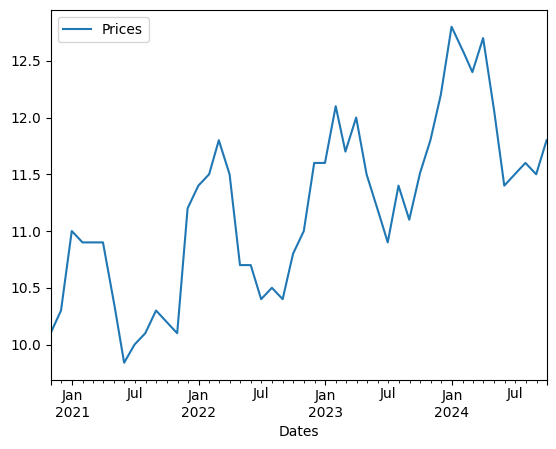

In [50]:
interpolated = upsampled.interpolate(method = 'linear')
interpolated.plot()

<Axes: xlabel='Dates'>

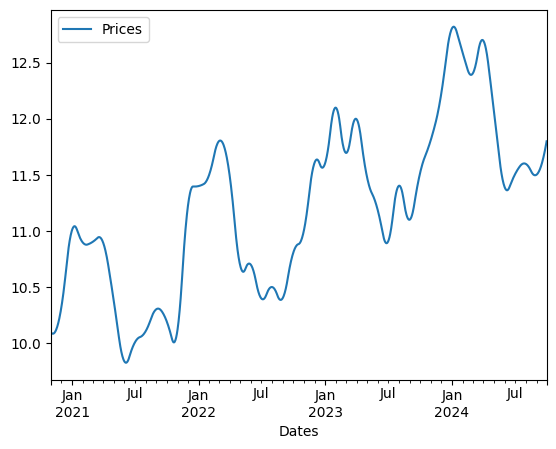

In [51]:
interpolated2 = upsampled.interpolate(method = 'polynomial', order = 2)
interpolated2.plot()

#### Downsampling (Aggregating)

This is exact opposite, instead of increasing the number of x-values you decrease them. Aggregate the time frequency from a lower level to a higher level. This will shrink the size of data, hehe.

In [52]:
upsampled
downsampled = upsampled.resample('Q').mean()

C:\Users\vineet\AppData\Local\Temp\ipykernel_21516\3214584026.py:2: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  downsampled = upsampled.resample('Q').mean()


In [53]:
downsampled

,Prices
Dates,
2020-12-31,10.466667
2021-03-31,10.900000
2021-06-30,10.080000
2021-09-30,10.200000
2021-12-31,10.900000
2022-03-31,11.600000
2022-06-30,10.600000
2022-09-30,10.566667
2022-12-31,11.400000


In [54]:
#compare downsampled vs og data

len(df.Prices), len(downsampled.Prices)

(48, 16)

### Visualize 

<Axes: xlabel='Dates'>

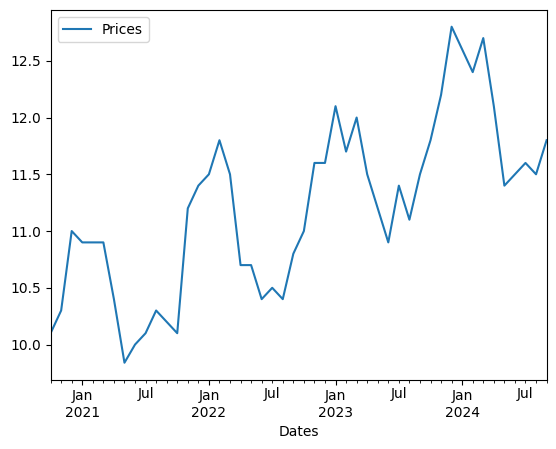

In [55]:
df.plot()

### Linear Regression 

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
df ["Dates"] = df.index
df ["Dates"] = df["Dates"].map(pd.Timestamp.toordinal)  #
df

,Prices,Dates
Dates,,
2020-10-31,10.10,737729
2020-11-30,10.30,737759
2020-12-31,11.00,737790
2021-01-31,10.90,737821
2021-02-28,10.90,737849
2021-03-31,10.90,737880
2021-04-30,10.40,737910
2021-05-31,9.84,737941
2021-06-30,10.00,737971


In [57]:
X = df[["Dates"]]
y = df["Prices"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, shuffle = False) #splitting data in proportion of 80% and 20%

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
y_pred

Mean Squared Error: 0.39809168696816954


array([11.72321123, 11.76159314, 11.79749879, 11.8358807 , 11.87302448,
       11.91140638, 11.94855016, 11.98693207, 12.02531397, 12.06245775])

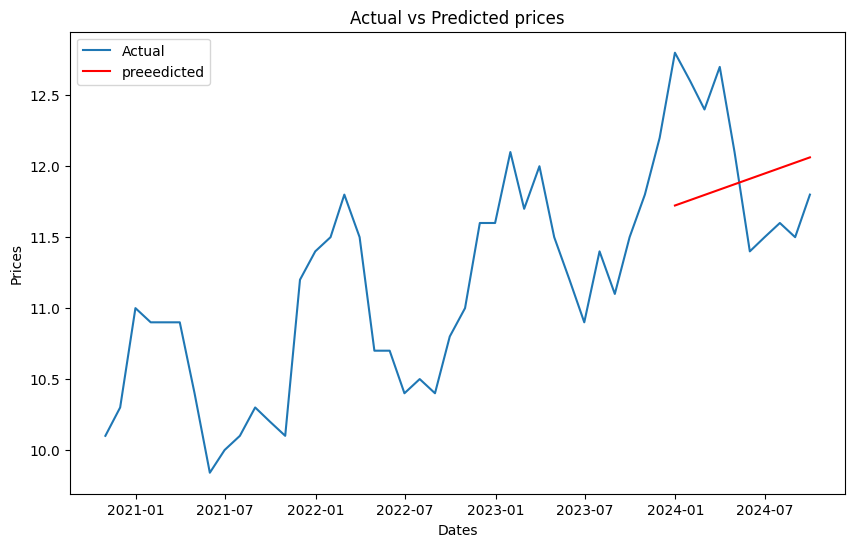

In [58]:
plt.figure(figsize=(10,6))
plt.plot(df.index, df['Prices'], label = 'Actual')
plt.plot(X_test .index, y_pred, label ="preeedicted", color = 'red' )
plt.title("Actual vs Predicted prices")
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()

### Stationerity of Data


In [59]:
df.drop(["Dates"], axis = 'columns', inplace= True)

In [60]:
df

,Prices
Dates,
2020-10-31,10.10
2020-11-30,10.30
2020-12-31,11.00
2021-01-31,10.90
2021-02-28,10.90
2021-03-31,10.90
2021-04-30,10.40
2021-05-31,9.84
2021-06-30,10.00


<Axes: xlabel='Dates'>

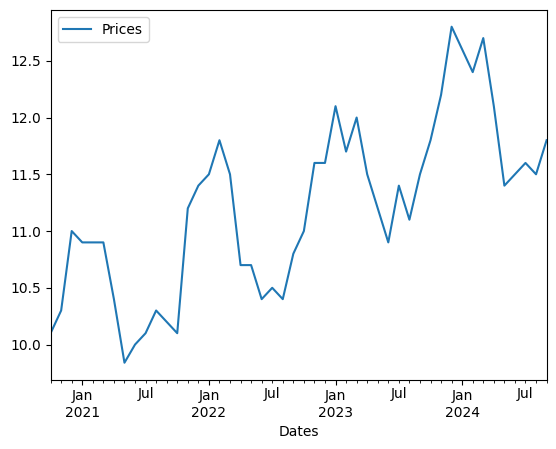

In [61]:
df.plot()

#### Evaluating descriptive statistics :

This is usually done by splitting the data into two or more partitions and calculating the mean and variance for each group. If these first-order moments are consistent among these partitions, then we can assume that the data is stationary

In [62]:
prices = df.Prices
parts = int(len(prices)/3)

part_1, part_2, part_3 = prices[0:parts], prices[parts:(parts)*2], prices[(parts)*2:(parts)*3]
mean_1, mean_2, mean_3 = part_1.mean(), part_2.mean(), part_3.mean()
var_1, var_2, var_3 = part_1.var(), part_2.var(), part_3.var()

print(mean_1, mean_2, mean_3)
print(var_1, var_2, var_3)
mean_3

10.571250000000001 11.21875 11.83125
0.2862916666666667 0.3349583333333333 0.3316249999999999


np.float64(11.83125)

Mean and variance of different seciton of data are quite different but not that different - this indicates stationarity. This method can fail for some distribution, like log-norm distribution. 

### ADF test 

This is a statistical test that is dedicatedly built to test whether univariate time series data is stationary or not. This test is based on a hypothesis and can tell us the degree of probability to which it can be accepted. It is often classified under one of the unit root tests, It determines how strongly, a univariate time series data follows a trend. Let’s define the null and alternate hypotheses,

* Ho (Null Hypothesis): The time series data is non-stationary
* H1 (alternate Hypothesis): The time series data is stationary

Assume alpha = 0.05, meaning (95% confidence). The test results are interpreted with a p-value if p > 0.05 fails to reject the null hypothesis, else if p <= 0.05 reject the null hypothesis.


In [63]:
from statsmodels.tsa.stattools import adfuller
pricesd = df.Prices
result = adfuller(prices) #adfuller might be a class

# Printing the statistical result of the adfuller test
print("Augmneted Dicky_Fuller Statistic : %f" % result[0])
print('p-value: %f' % result[1])

# printing the critical values at different alpha levels.
print('critical values at different levels:')
for k, v in result[4].items():
    print('\t%s: %.3f' % (k, v))

Augmneted Dicky_Fuller Statistic : 0.218077
p-value: 0.973257
critical values at different levels:
	1%: -3.621
	5%: -2.944
	10%: -2.610


basic gist of p-value is the data is not stationary. Making data stationary by first difference. 

ADF statistic ; -6.844774
p-value: 0.000000


<Axes: xlabel='Dates'>

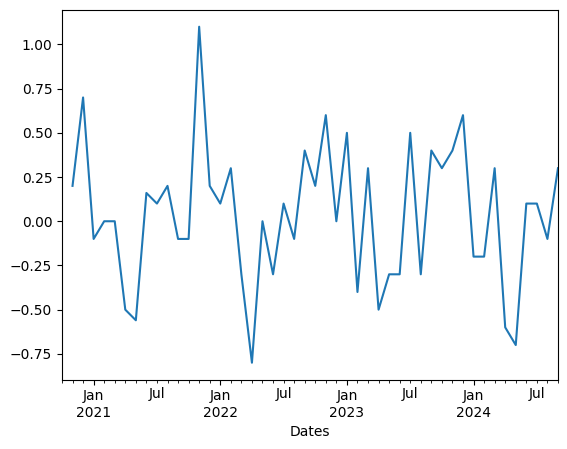

In [64]:
df["PricesFirstdifference"] = df["Prices"]-df["Prices"].shift(1)
sprices = df.PricesFirstdifference.dropna()
res2 = adfuller(sprices)
print("ADF statistic ; %f"% res2[0])
print('p-value: %f' % res2[1])
df["PricesFirstdifference"].plot()

This new differenced data is stationary, It does not display any trend or seasonal variation over a period of time. Also indicated by the p-value which is zero. 

#### Autocorrelation plot

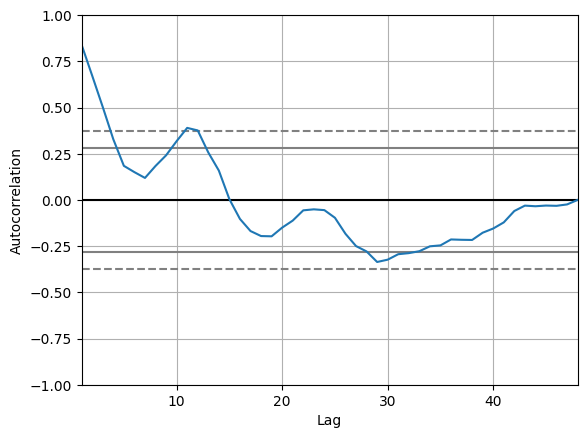

In [65]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Prices'])
plt.show()

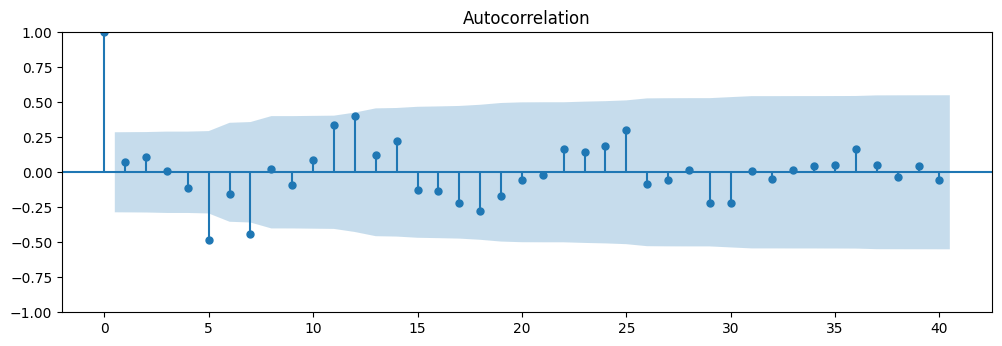

In [66]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm
fig = plt.figure(figsize = (12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['PricesFirstdifference'].dropna(), lags = 40, ax = ax1)

In [67]:
df

,Prices,PricesFirstdifference
Dates,,
2020-10-31,10.10,NaN
2020-11-30,10.30,0.20
2020-12-31,11.00,0.70
2021-01-31,10.90,-0.10
2021-02-28,10.90,0.00
2021-03-31,10.90,0.00
2021-04-30,10.40,-0.50
2021-05-31,9.84,-0.56
2021-06-30,10.00,0.16


In [68]:
# since there are 48 rows, I am going to divide data into 32 training points and 16 testing

train = df[0:32]
test = df[32:]

#### Different methods to forecast in a time series data

https://www.analyticsvidhya.com/blog/2018/02/time-series-forecasting-methods/#h-understanding-the-problem-statement-and-dataset

#### Visualize train and test data together

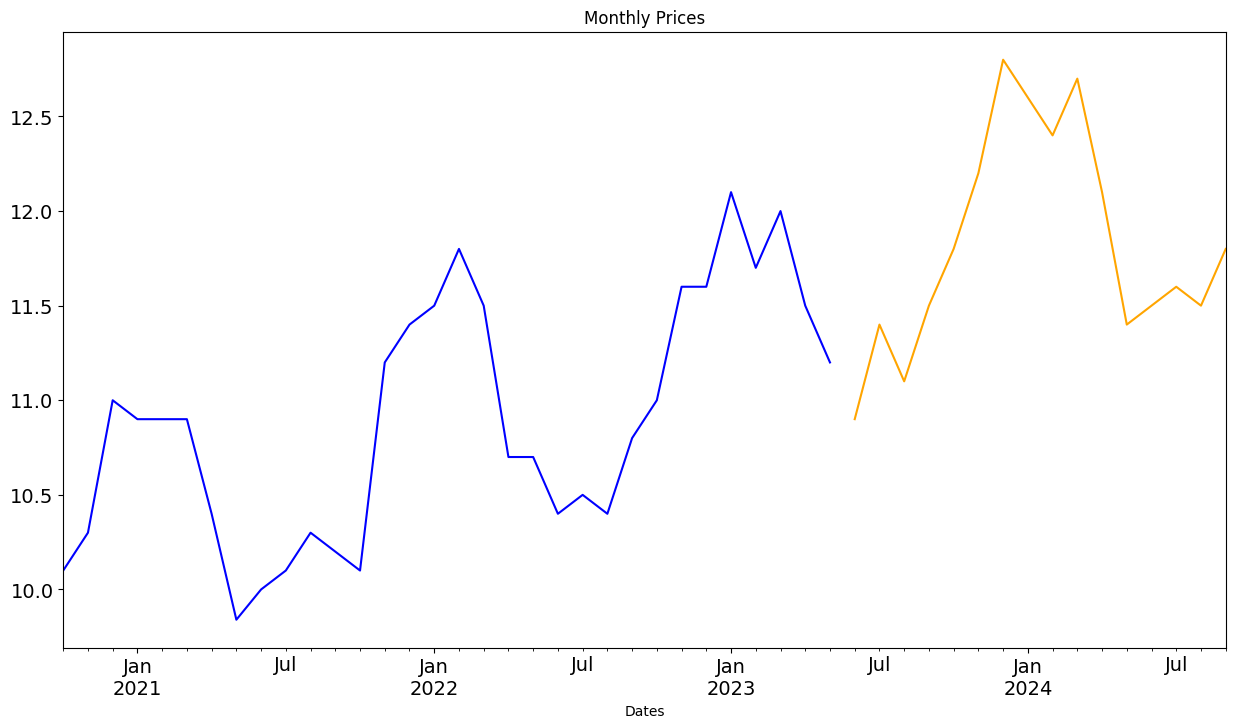

In [69]:
train.Prices.plot(figsize = (15,8), title = "Monthly Prices", fontsize = 14, color = "blue")
test.Prices.plot(figsize = (15,8), title = "Monthly Prices", fontsize = 14, color = "orange")
plt.show()

#### Naive Forecast

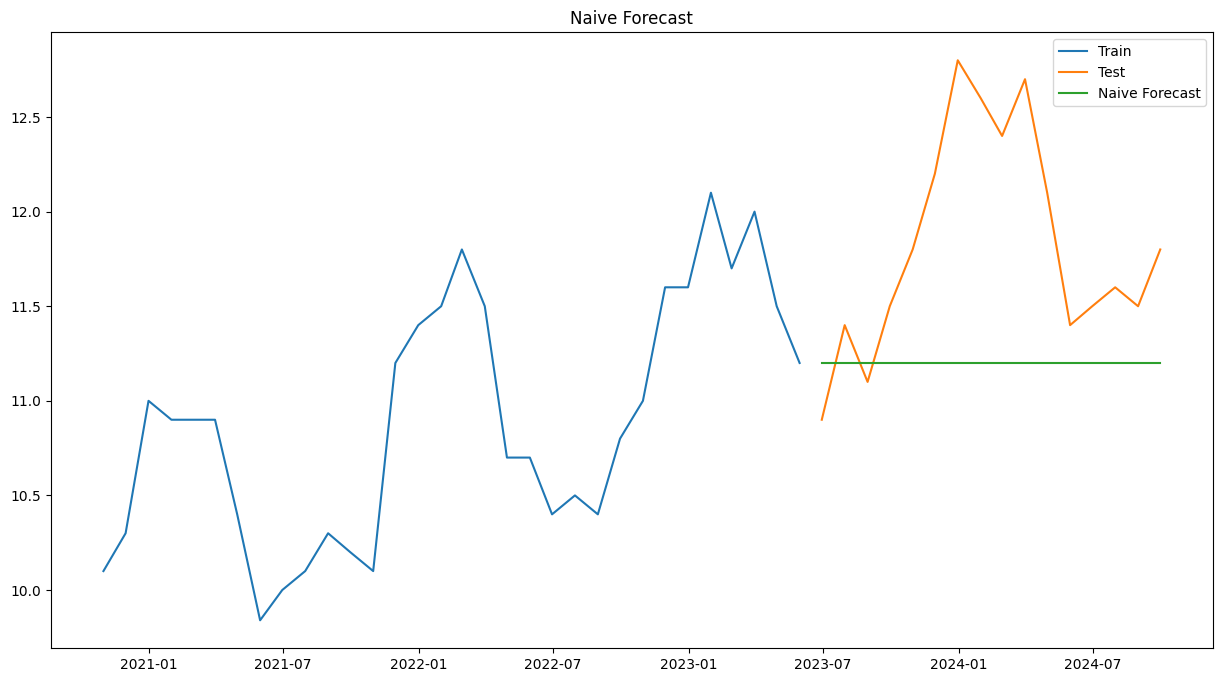

In [70]:
dd = np.asarray(train.Prices)
y_hat = test.copy()
y_hat['naive'] = dd[len(dd)-1]

plt.figure(figsize = (15,8))
plt.plot(train.index, train["Prices"], label = "Train")
plt.plot(test.index, test["Prices"], label = "Test")
plt.plot(y_hat.index, y_hat["naive"], label = "Naive Forecast")
plt.legend(loc="best")
plt.title("Naive Forecast")
plt.show()


#### Checking the accuracy of model by calculating RMSE

In [71]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(test.Prices, y_hat.naive))
print(rms)

0.8422440263961514


WHAT DOES THIS VALUE SAYYYYYYY ??

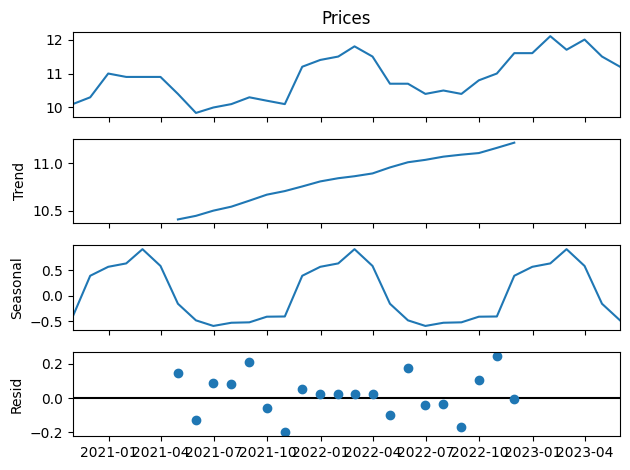

In [72]:
import statsmodels.api as sm
sm.tsa.seasonal_decompose(train.Prices).plot()
# result = sm.tsa.stattools.adfuller(train.Prices)
plt.show()

#### Simple Average Forecasting 

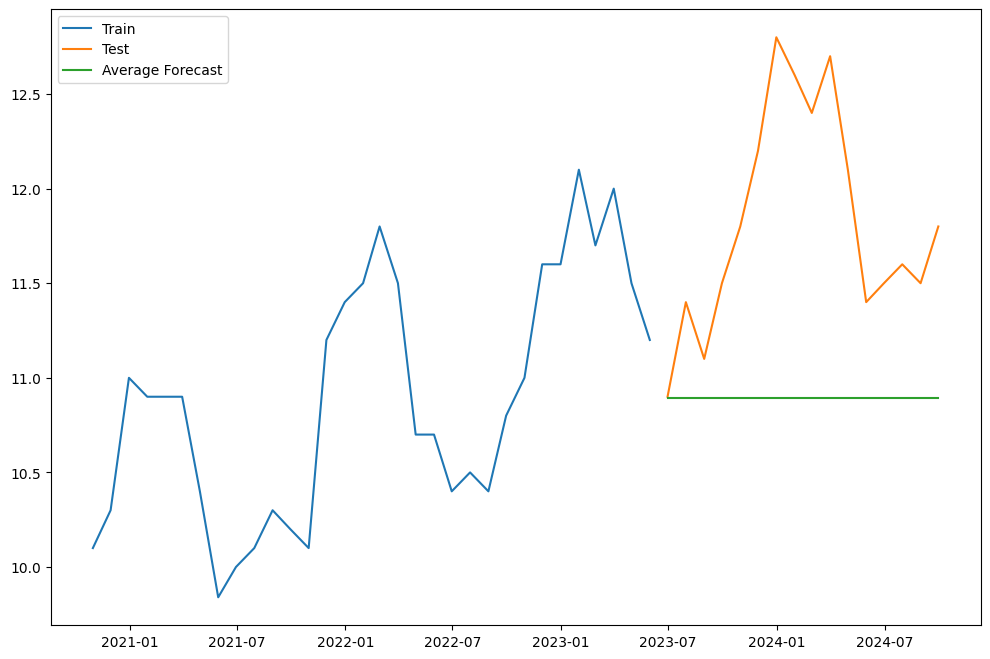

In [73]:
y_hat_avg = test.copy()
y_hat_avg['avg_forecast'] = train['Prices'].mean()
plt.figure(figsize = (12,8))
plt.plot(train['Prices'], label = 'Train')
plt.plot(test['Prices'], label = 'Test')
plt.plot(y_hat_avg['avg_forecast'], label = 'Average Forecast')
plt.legend(loc = 'best')
plt.show()


In [74]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(test.Prices, y_hat_avg.avg_forecast))
print(rms)

1.089707529569288


#### Moving Average Time Sereies Forecasting Python

In this method, to predict a particular time's value you average out a certain number of past readings. For the next reading also you do the same, so now the predicted value of (t) will be considered for t+1 

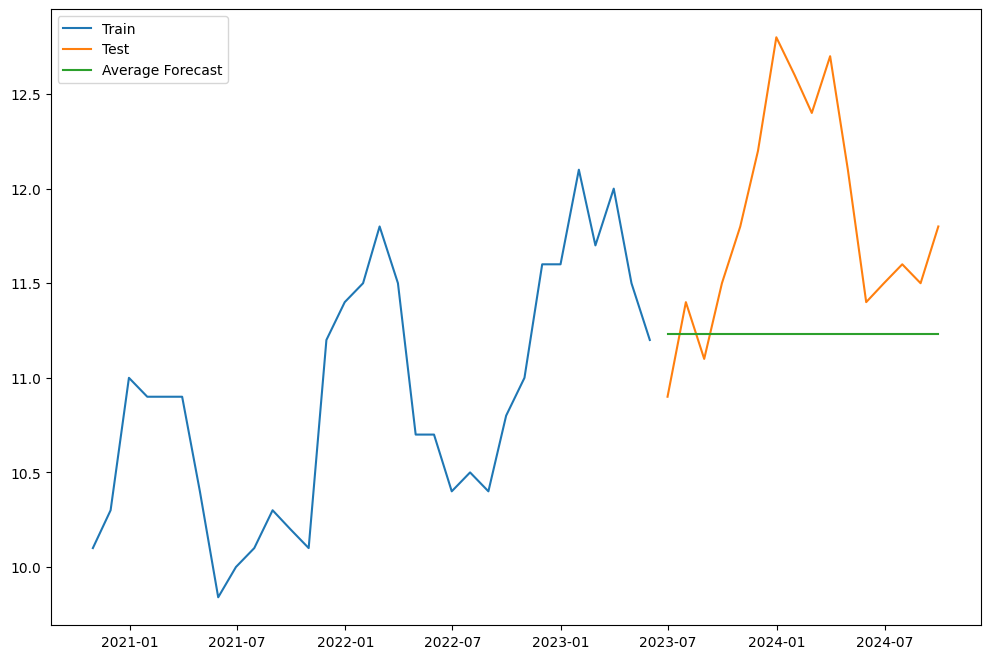

,Prices,PricesFirstdifference,moving_avg_forecast
Dates,,,
2023-06-30,10.9,-0.3,11.233333
2023-07-31,11.4,0.5,11.233333
2023-08-31,11.1,-0.3,11.233333
2023-09-30,11.5,0.4,11.233333
2023-10-31,11.8,0.3,11.233333
2023-11-30,12.2,0.4,11.233333
2023-12-31,12.8,0.6,11.233333
2024-01-31,12.6,-0.2,11.233333
2024-02-29,12.4,-0.2,11.233333


In [91]:
y_hat_avg = test.copy()
y_hat_avg['moving_avg_forecast'] = train['Prices'].rolling(12).mean().iloc[-1]
y_hat_avg
gg = train.copy()
gg["Compare"] = train['Prices'].rolling(12).mean()
plt.figure(figsize = (12,8))
plt.plot(train['Prices'], label = 'Train')
plt.plot(test['Prices'], label = 'Test')
plt.plot(y_hat_avg['moving_avg_forecast'], label = 'Average Forecast')
plt.legend(loc = 'best')
plt.show()
y_hat_avg

#### Simple Exponential Smoothening

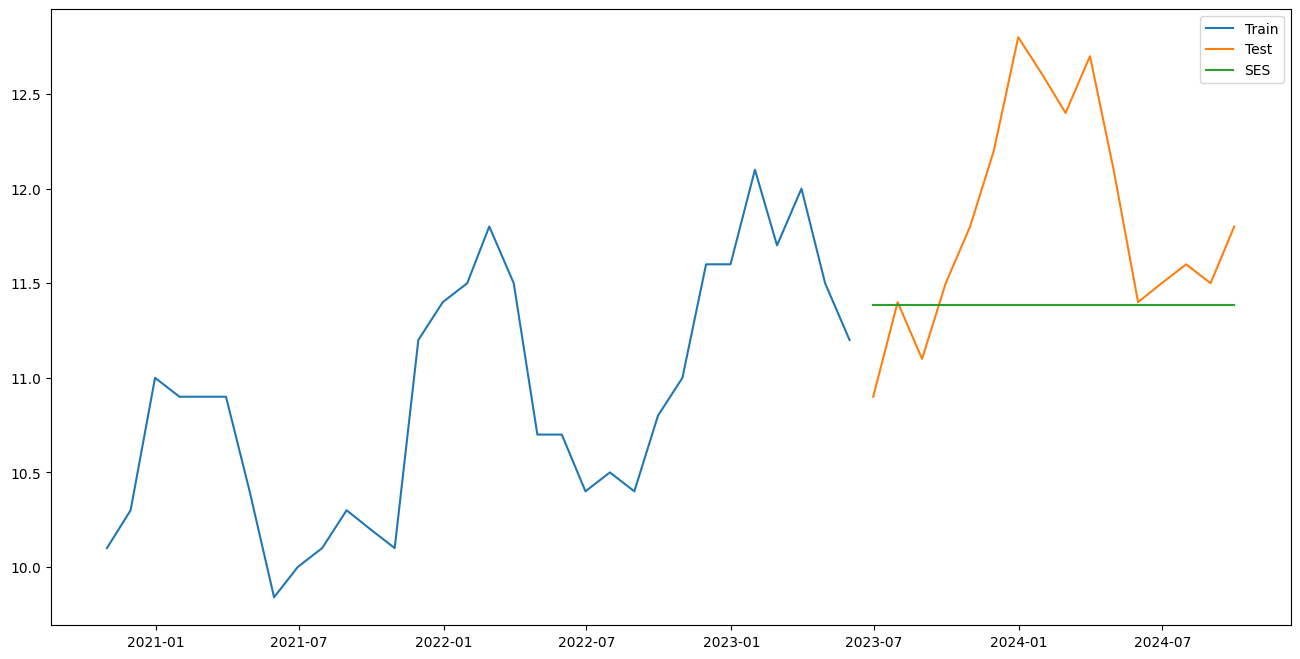

In [76]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
y_hat_avg = test.copy()
fit2 = SimpleExpSmoothing(np.asarray(train["Prices"])).fit(smoothing_level =0.6, optimized = False)
y_hat_avg['SES'] = fit2.forecast(len(test))
plt.figure(figsize=(16,8))
plt.plot(train["Prices"], label = "Train")
plt.plot(test["Prices"], label = "Test")
plt.plot(y_hat_avg['SES'], label = 'SES')
plt.legend(loc = 'best')
plt.show()

In [77]:
y_hat_avg

,Prices,PricesFirstdifference,SES
Dates,,,
2023-06-30,10.9,-0.3,11.384715
2023-07-31,11.4,0.5,11.384715
2023-08-31,11.1,-0.3,11.384715
2023-09-30,11.5,0.4,11.384715
2023-10-31,11.8,0.3,11.384715
2023-11-30,12.2,0.4,11.384715
2023-12-31,12.8,0.6,11.384715
2024-01-31,12.6,-0.2,11.384715
2024-02-29,12.4,-0.2,11.384715


In [78]:
rms = sqrt(mean_squared_error(test.Prices, y_hat_avg.SES))
print(rms)

0.7143474427782678


#### Holt's Linear Trend Method

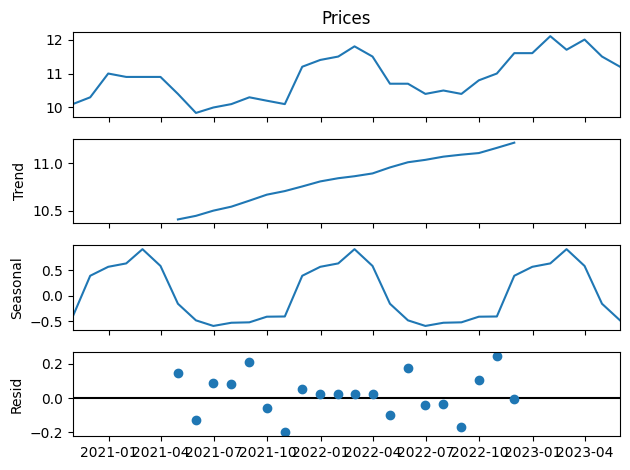

In [79]:
import statsmodels.api as sm
sm.tsa.seasonal_decompose(train.Prices).plot()
result = sm.tsa.stattools.adfuller(train.Prices)
plt.show()

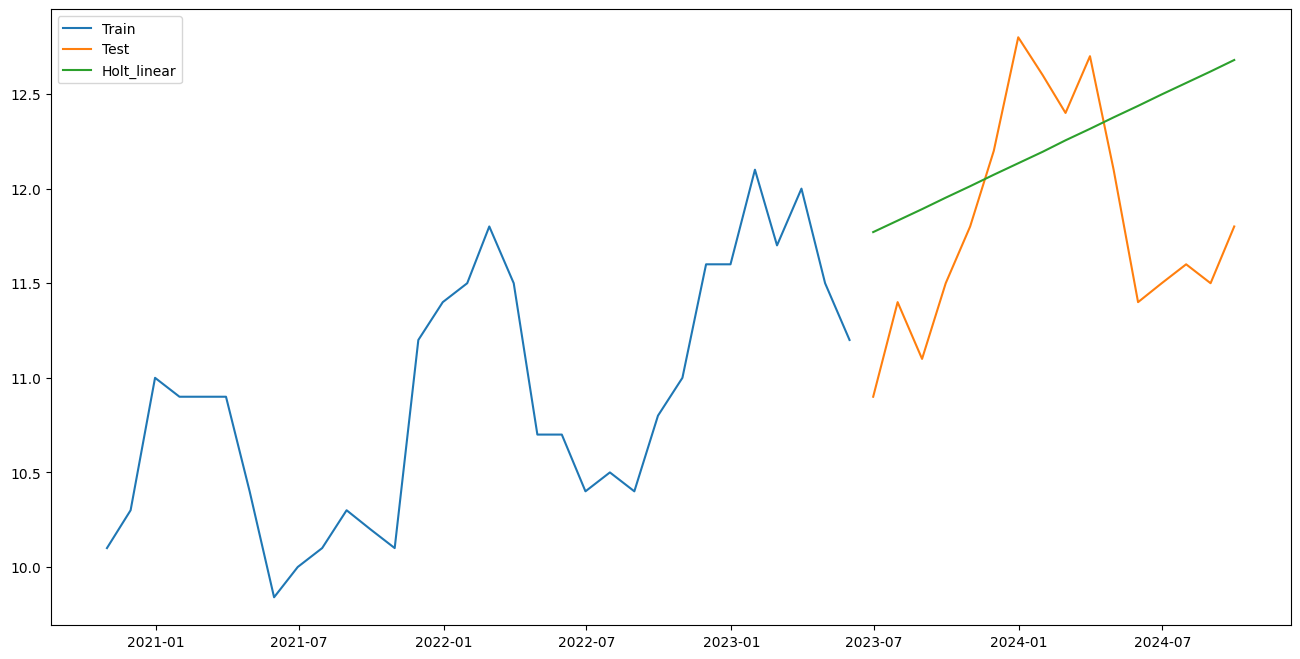

In [80]:
y_hat_avg = test.copy()

fit1 = Holt(np.asarray(train["Prices"])).fit(smoothing_level = 0.3, smoothing_trend = 0.2, optimized = False)
y_hat_avg["Holt_linear"] = fit1.forecast(len(test))
plt.figure(figsize = (16,8))
plt.plot(train['Prices'], label = "Train")
plt.plot(test['Prices'],  label = "Test")
plt.plot(y_hat_avg["Holt_linear"], label = "Holt_linear")
plt.legend(loc="best")
plt.show()


In [81]:
rms = sqrt(mean_squared_error(test.Prices, y_hat_avg.Holt_linear))
print(rms)

0.6939908535022948


#### Holt's Winters Method

Holt's Linear Trend method is good when you only have to think about trend but if the data is also showing seasonality then we have to use this.

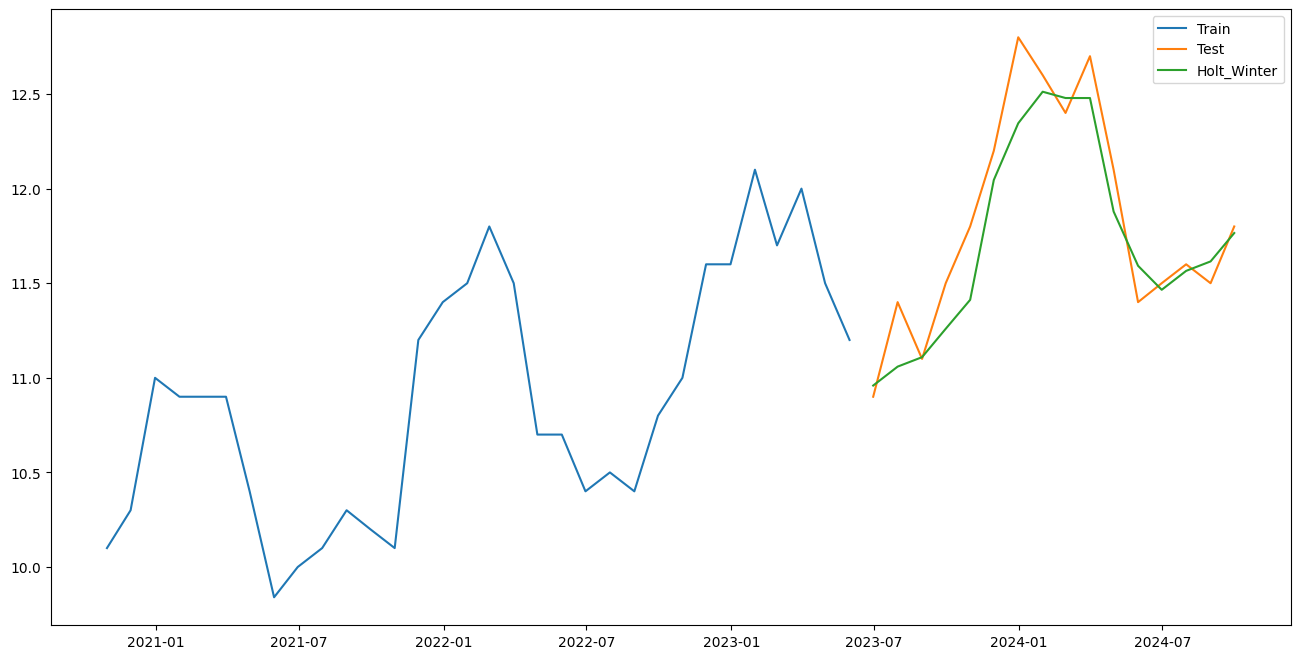

In [89]:
y_hat_avg = test.copy()
fit1 = ExponentialSmoothing(np.asarray(train['Prices']), seasonal_periods = 12, trend = 'add', seasonal = 'add').fit() #12 because seasonality
y_hat_avg['Holt_Winter'] = fit1.forecast(len(test))
plt.figure(figsize = (16,8))
plt.plot(train["Prices"], label = "Train")
plt.plot(test["Prices"], label = "Test")
plt.plot(y_hat_avg["Holt_Winter"], label = "Holt_Winter")
plt.legend(loc='best')
plt.show()

In [38]:
rms = sqrt(mean_squared_error(test.Prices, y_hat_avg.Holt_Winter))
print(rms)


0.706895830250317


c:\Users\vineet\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\vineet\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\vineet\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\vineet\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal movin

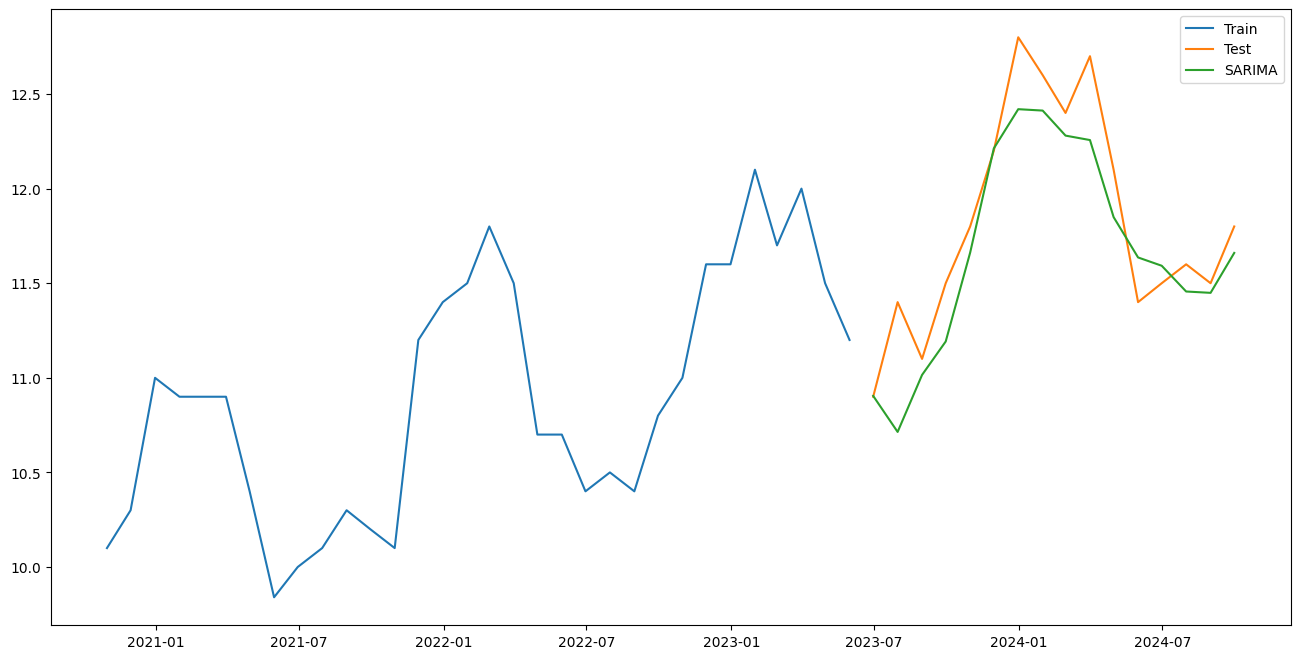

In [ ]:
y_hat_avg = test.copy()
fit1 = sm.tsa.statespace.SARIMAX(train.Prices, order = (2,1,4), seasonal_order = (0,1,1,7)).fit()
y_hat_avg["SARIMA"] = fit1.predict(start="2023-06-30", end = "2024-09-30", dynamic = True)
plt.figure(figsize = (16,8))
plt.plot(train["Prices"], label = "Train")
plt.plot(test["Prices"], label = "Test")
plt.plot(y_hat_avg["SARIMA"], label = "SARIMA")
plt.legend(loc="best")
plt.show()



In [40]:
rms = sqrt(mean_squared_error(test.Prices, y_hat_avg.SARIMA))
print(rms)

0.2683693368609222


In [41]:
y_hat_avg

,Prices,PricesFirstdifference,SARIMA
Dates,,,
2023-06-30,10.9,-0.3,10.904427
2023-07-31,11.4,0.5,10.713946
2023-08-31,11.1,-0.3,11.015379
2023-09-30,11.5,0.4,11.192057
2023-10-31,11.8,0.3,11.661725
2023-11-30,12.2,0.4,12.212318
2023-12-31,12.8,0.6,12.419939
2024-01-31,12.6,-0.2,12.412555
2024-02-29,12.4,-0.2,12.280231
